#  Titanic: Machine Learning from Disaster 
 
# ※ 타이타닉으로 머신러닝 배우기 ※

In [52]:
from IPython.display import Image
Image(url= "http://file2.instiz.net/data/file/20140805/1/7/8/17896e8e4408d4e1316e80ad63682700.jpg")

## 목차
- 1.목표
- 2.데이터 가져오기
- 3.데이터 정제하기
- 4.분석 모델 정하기
- 5.분석 & 답안 제출하기 

# 1. 목표
- 타이타닉 승객의 데이터(train.csv)를 학습해 테스트 데이터(test.csv) 승객의 생존 여부를 정확하게 예측해 내는 것을 목표로 한다.
- Kaggle에서 제공하는 train.csv, test.csv를 받아 competition을 진행 
- 예측을 통해 타이타닉 참사가 가진 특성,승객들이 생존하는데 영향을 미쳤던 요소에 대해 공부해보고 어떤 방식으로 접근해야 더 정확한 예측이 가능한지 연구한다 . 

# 2.데이터 가져오기

https://www.kaggle.com/c/titanic/data 에서 test.csv,train.csv 파일을 작업 디렉토리에 다운로드 받는다.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 데이터 사전

- Passenger ID: 승객의 고유번호 
- Survived: 생존의 유무 (0 = 사망,1= 생존)
- Pclass: 승객의 객실 등급 (1 = 상, 2 = 중, 3 = 하)
- Name: 승객의 이름 ( 성, 호칭. 이름) 
- Sex: 승객의 성별
- Age: 승객의 나이 
- SibSp: Siblings & Spouses, 형제나 배우자의 동승 여부 및 인원 수 
- Parch: Parents & Children, 부모나 자녀의 동승 여부 및 인원 수
- Ticket: 티켓 번호
- Fare: 티켓 가격
- Cabin: 선실의 번호 
- Embarked: 승선한 도시 (C = Cherbourg, Q = Queenstown, S = Southampton)

참조 - https://www.kaggle.com/c/titanic/data 

In [6]:
train.shape

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


train 데이터에는 891명의 데이터가 있다는 것을 확인할 수 있다.

나이, 선실 번호, 승선한 도시의 데이터가 조금씩 누락된 것도 확인 할 수 있다

In [8]:
test.shape

(418, 11)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


481명의 데이터가 존재하며 train 데이터와는 다르게  Survived 항목이 없다.(예측해야하는 데이터이기 때문에) 

test 데이터에도 마찬가지로 나이,선실 번호, 티켓가격이 누락된 것이 확인이 가능하다. 

## 이제 데이터에 어떤 속성들이 생존에 영향을 미치는지 확인해보기 위해 그래프를 그려보자.

### Bar 차트에 대한 정의

In [49]:
def bar_chart(feature):
    Yes = train[train['Survived']==1][feature].value_counts()
    No = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([Yes,No])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar',stacked = True,figsize = (10,10))

### 1.Pclass (객실의 등급)

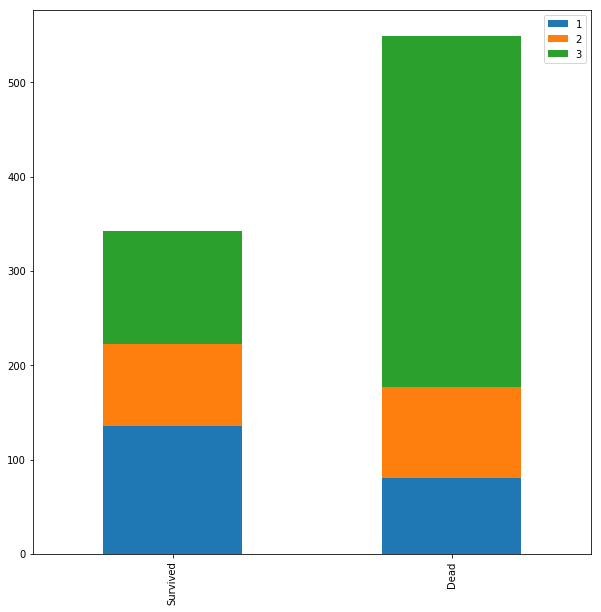

In [48]:
bar_chart('Pclass')

보는것과 같이 더 높은 등급에 승차한 승객일수록 살 확률은 더 높았다.

2등급은 비슷한 것처럼 생존자와 비생존자의 차이가 거의 없지만 3등급은 생존자가 매우 낮은것을 확인 할 수 있다. 

### 2.Sex (성별)

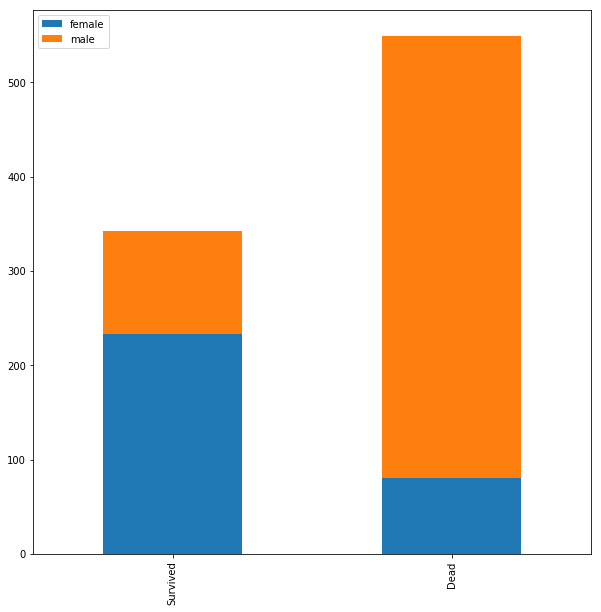

In [50]:
bar_chart('Sex')

남자 승객과 여자 승객의 생존 할 확률이 극심하게 차이나는 것을 볼 수 있다.

여자일때 생존확률이 높으므로 승객의 성별은 테스트 데이터에서 생존을 예측하는데 아주 중요한 속성임을 알수 있다. 

### 3.SibSp (형제나 배우자의 동승 여부 및 인원 수)

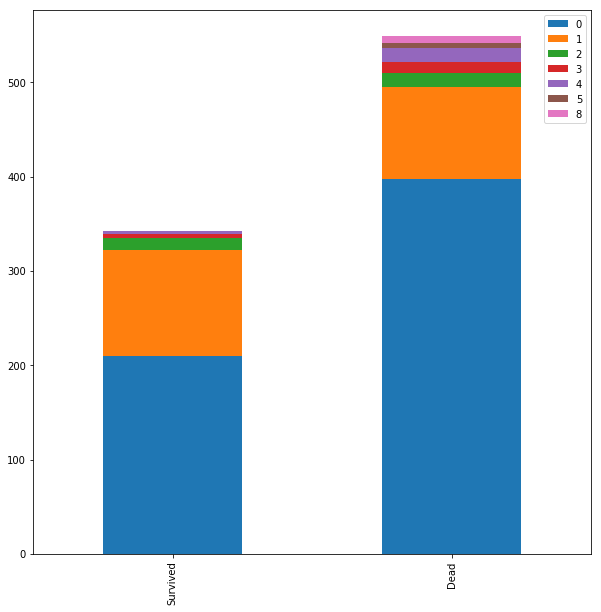

In [55]:
bar_chart('SibSp')

형제나 배우자와 동승한 사람들은 그리 많아 보이지 않는다. 

동승자가 1명 2명일 경우에는 생존 확률이 거의 비슷해 보이고 그 이상일 경우에는 생존 확률이 더 적은것으로 보인다.

### 4.Parch(부모나 자녀의 동승 여부 및 인원 수)

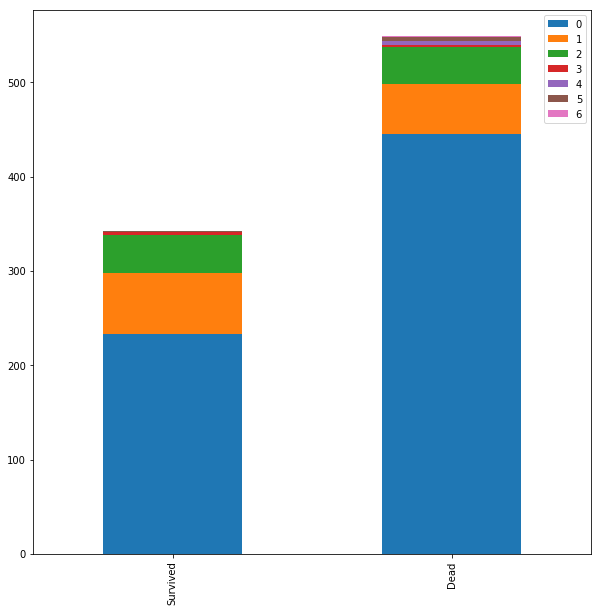

In [56]:
bar_chart('Parch')

위와 마찬가지로 부모나 자녀와 동승한 사람들의 수가 훨씬 적은것을 볼 수 있다.

동승자가 1명일 경우와 3명일 경우는 생존 확률이 조금 더 높은 것으로 보이고 2명일 경우에는 비슷해보인다. 

3명 보다 더 많을 경우에는 생존 확률이 더 적은 것으로 보인다.